In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('Unemployment in India.csv')

In [32]:
df.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [33]:
df.duplicated().sum()

27

In [35]:
df = df.drop_duplicates()

In [36]:
df = df.reset_index(drop=True)

In [37]:
df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [38]:
df = df.dropna()

In [39]:
df = df.reset_index(drop=True)

In [40]:
df.columns = df.columns.str.strip()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 40.6+ KB


In [42]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [43]:
average_unemp_rate = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

In [44]:
highest_unemp_region = average_unemp_rate.idxmax()
highest_unemp_rate = average_unemp_rate.max()

In [45]:
lowest_unemp_region = average_unemp_rate.idxmin()
lowest_unemp_rate = average_unemp_rate.min

In [46]:
print("Region with highest Unmployment rate:", highest_unemp_region)

Region with highest Unmployment rate: Tripura


In [47]:
print("Region with lowest Unemployment rate:", lowest_unemp_region)

Region with lowest Unemployment rate: Meghalaya


In [48]:
sns.set_palette("husl")

In [49]:
plt.figure(figsize=(14,7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

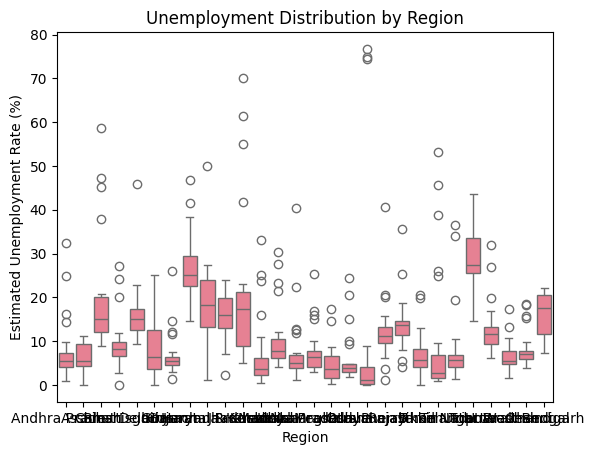

In [50]:
sns.boxplot(x = 'Region', y = 'Estimated Unemployment Rate (%)', data=df)
plt.title("Unemployment Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()
           

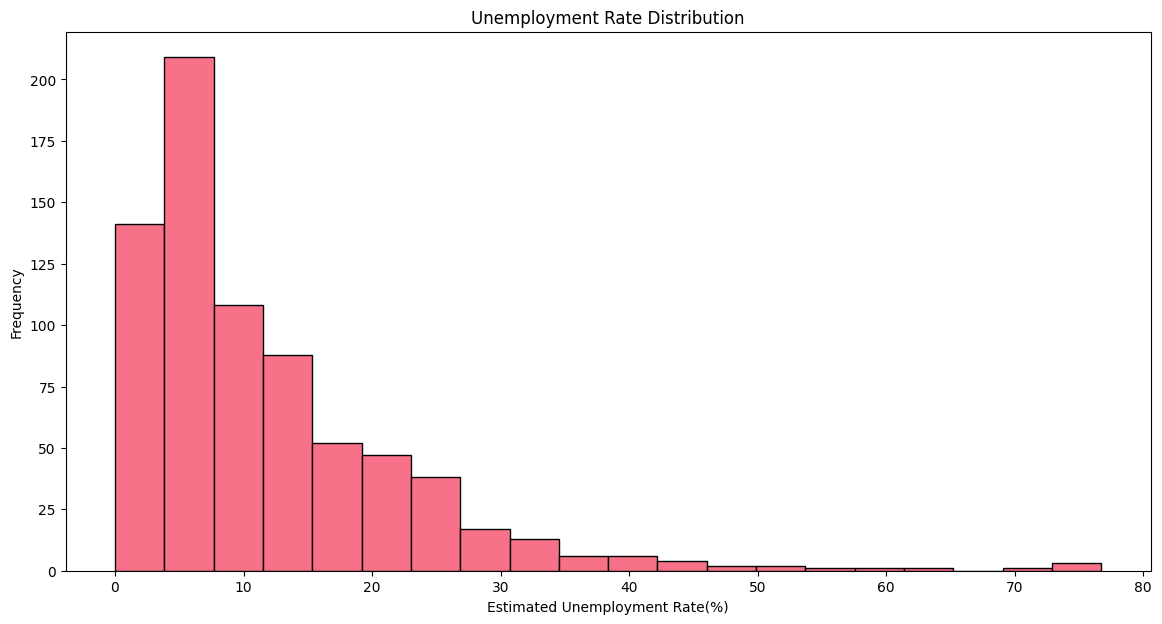

In [51]:
plt.figure(figsize=(14,7))
plt.hist(df['Estimated Unemployment Rate (%)'], bins=20, edgecolor='k')
plt.title("Unemployment Rate Distribution")
plt.xlabel("Estimated Unemployment Rate(%)")
plt.ylabel("Frequency")
plt.show()

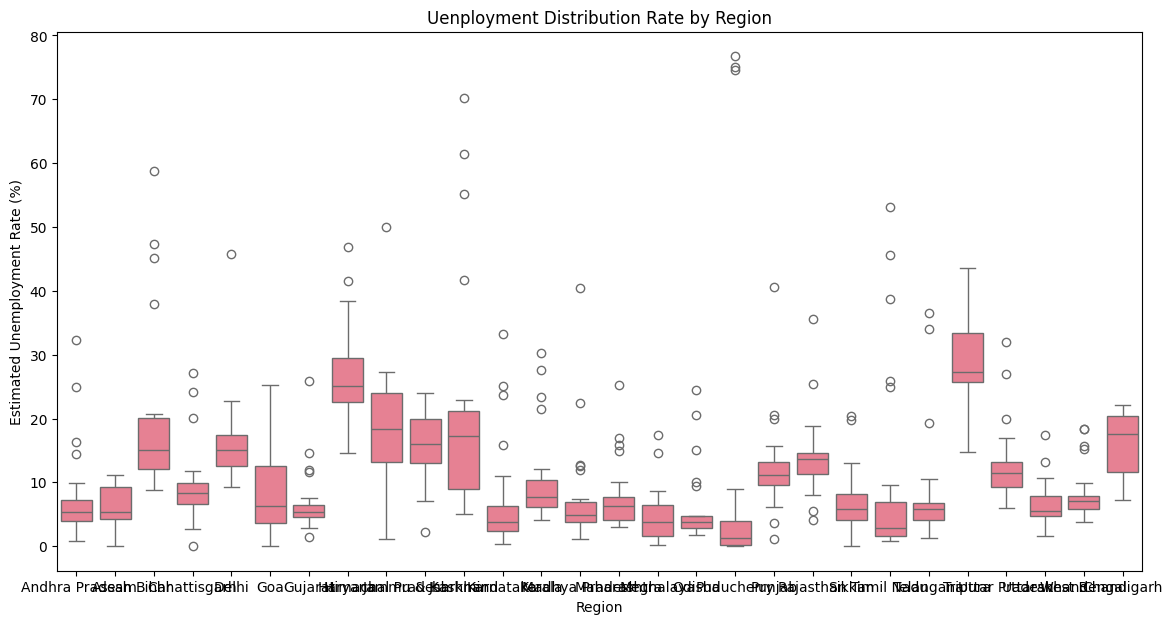

In [52]:
plt.figure(figsize=(14,7))
sns.boxplot(x='Region', y = 'Estimated Unemployment Rate (%)', data=df)
plt.title("Uenployment Distribution Rate by Region")
plt.xlabel("Region")
plt.ylabel("Estimated Unemployment Rate (%)")
plt.show()

In [53]:
sns.set_palette("Set2")

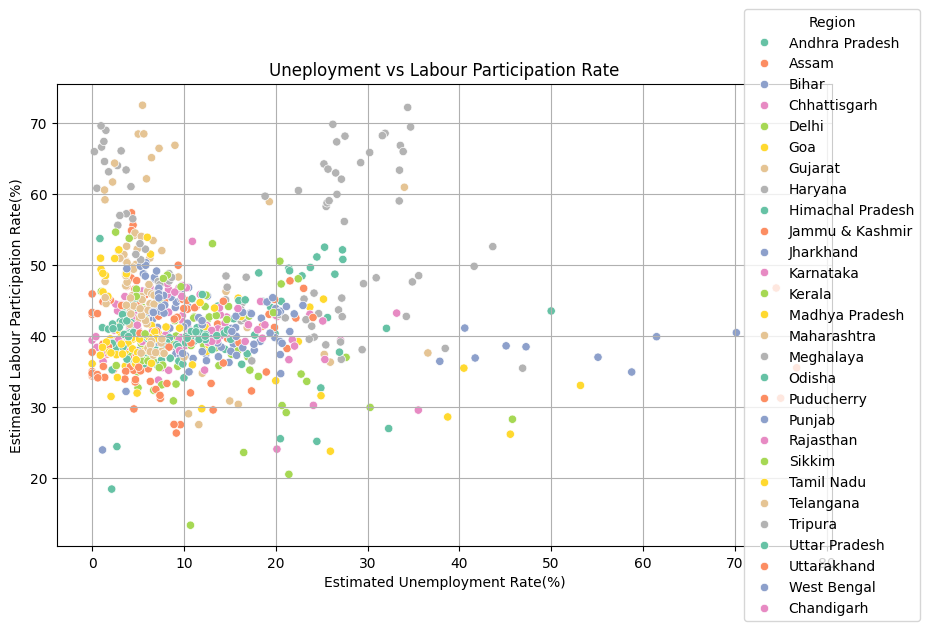

In [54]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Estimated Unemployment Rate (%)', y = 'Estimated Labour Participation Rate (%)', data=df, hue= 'Region', palette='Set2',legend='full')
plt.title("Uneployment vs Labour Participation Rate")
plt.xlabel('Estimated Unemployment Rate(%)')
plt.ylabel('Estimated Labour Participation Rate(%)')
plt.legend(title='Region',loc='center', bbox_to_anchor= (1,0.5))
plt.grid(True)
plt.show()
           

In [55]:
corr_matrix= df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)',]].corr()

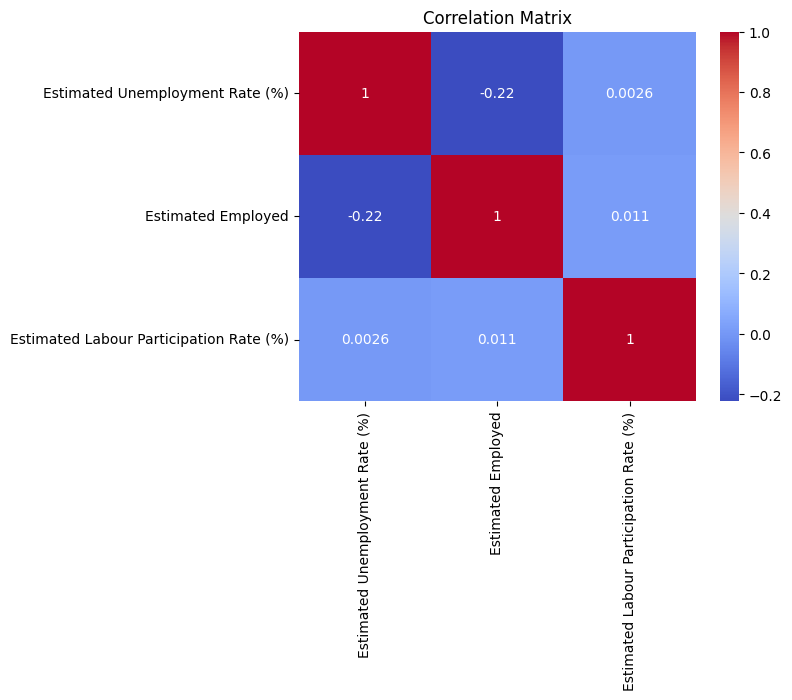

In [56]:
sns.heatmap(corr_matrix, annot= True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [57]:
df[' Date'] = pd.to_datetime(df['Date'].str.strip(), format= '%d-%m-%Y')

In [58]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Date
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30


In [59]:
df_numeric = df.drop(columns= ['Region', 'Frequency', 'Area'])

In [60]:
df_numeric.head()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Date
0,31-05-2019,3.65,11999139.0,43.24,2019-05-31
1,30-06-2019,3.05,11755881.0,42.05,2019-06-30
2,31-07-2019,3.75,12086707.0,43.50,2019-07-31
3,31-08-2019,3.32,12285693.0,43.97,2019-08-31
4,30-09-2019,5.17,12256762.0,44.68,2019-09-30


In [61]:
df_numeric_average = df_numeric.groupby('Date').mean()

In [62]:
print(df_numeric_average)

            Estimated Unemployment Rate (%)  Estimated Employed  \
Date                                                              
29-02-2020                         9.964717        7.603996e+06   
30-04-2020                        23.641569        5.283320e+06   
30-06-2019                         9.303333        7.358642e+06   
30-06-2020                        11.903600        7.387009e+06   
30-09-2019                         9.051731        7.739464e+06   
30-11-2019                         9.868364        7.273661e+06   
31-01-2020                         9.950755        7.677344e+06   
31-03-2020                        10.700577        7.516581e+06   
31-05-2019                         8.874259        7.410148e+06   
31-05-2020                        24.875294        5.879363e+06   
31-07-2019                         9.033889        7.404425e+06   
31-08-2019                         9.637925        7.539815e+06   
31-10-2019                         9.900909        7.298382e+0

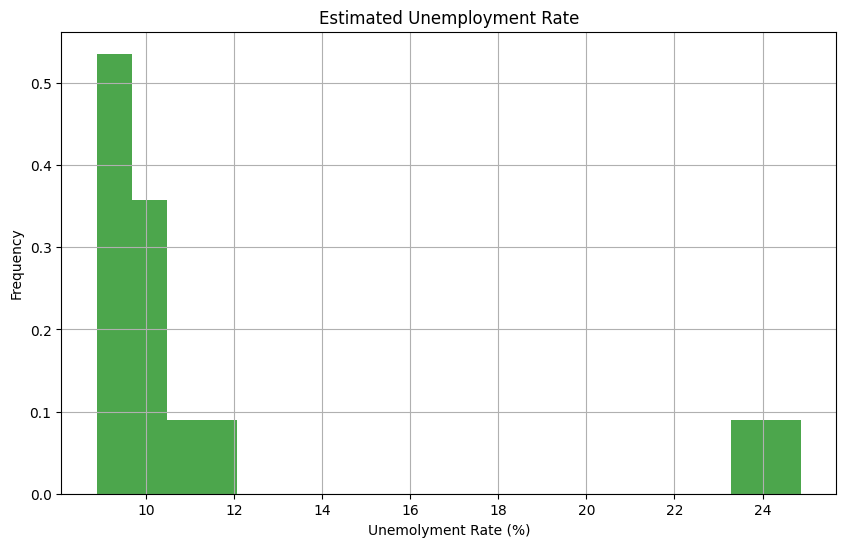

In [63]:
plt.figure(figsize=(10,6))
plt.hist(df_numeric_average['Estimated Unemployment Rate (%)'], bins=20, density=True, alpha=0.7, color='green')
plt.title('Estimated Unemployment Rate')
plt.xlabel('Unemolyment Rate (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()